In [856]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [857]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [858]:
from bokeh.plotting import figure, output_file, show

# SALES

In [859]:
sales = pd.read_csv('sales.csv',sep=';',index_col=0)
sales.head()

,day_of_week,date,Sales,customers_count,store_open,promo,statutory_holiday,school_holiday
store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


# DATA ANALYSIS

In [860]:
sales.info() #NO Null values, however, there are some categorical variables that need to be converted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44870 entries, 1 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   day_of_week        44870 non-null  int64 
 1   date               44870 non-null  object
 2   Sales              44870 non-null  int64 
 3   customers_count    44870 non-null  int64 
 4   store_open         44870 non-null  int64 
 5   promo              44870 non-null  int64 
 6   statutory_holiday  44870 non-null  object
 7   school_holiday     44870 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.1+ MB


In [861]:
#create day, month, year columns from from date column
sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d')
sales['month'] = pd.DatetimeIndex(sales['date']).month
sales['year'] = pd.DatetimeIndex(sales['date']).year
sales['day'] = pd.DatetimeIndex(sales['date']).day

In [862]:
#set PLOT style
plt.style.use('default')
plt.style.use('ggplot')


In [863]:
#number of sales by month
sales_mnth_avg=sales.groupby(['year','month'],as_index=False)['Sales'].mean()#.plot(title='Monthly Sales')
cols=["year","month"]
sales_mnth_avg['date'] = sales_mnth_avg[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
sales_mnth_avg.iplot(x='date', y='Sales')

#there are peaks in July and December 

In [864]:
#distribution of daily sales per month
sales_daily_dist=sales.groupby('day')['Sales'].mean().iplot(title='Average Sales in a day')

#peaks at the beggining and end of the month, small peak in the middle

In [865]:
#sales by day of a week
sales_daily_dist=sales.groupby('day_of_week')['Sales'].mean().iplot(title='Average Sales in a day')

#Monday is the day with the heighest sale rate, then the rate decrease (small increase on Friday)
#strong descent on Sunday cause the store is closed

# STORES

In [866]:
#DATA ANALYSIS OF STORES DATA
stores = pd.read_csv('stores.csv',sep=';',index_col=0)
stores.head()

,store_type,assortment_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year
store,,,,,,,
1,c,a,1270.0,0,NaN,NaN,9/2008
2,a,a,570.0,1,13.0,2010.0,11/2007
3,a,a,14130.0,1,14.0,2011.0,12/2006
4,c,c,620.0,0,NaN,NaN,9/2009
5,a,a,29910.0,0,NaN,NaN,4/2015


In [867]:
stores.info() #null values for last three columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   store_type                         49 non-null     object 
 1   assortment_type                    49 non-null     object 
 2   competition_distance               49 non-null     float64
 3   promo2                             49 non-null     int64  
 4   promo2_since_week                  27 non-null     float64
 5   Promo2_since_year                  27 non-null     float64
 6   competition_open_since_month_year  37 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.1+ KB


# DATA CLEANING AND PREPARING

In [868]:
#checking what kind of data are in state holiday column
print(sales.statutory_holiday.unique())


['0' 'a' 'b' 'c']


In [869]:
#using pandas dummy variables we can convert categorical variable into dummy/indicator variables
state_holiday=pd.get_dummies(sales['statutory_holiday']) 
state_holiday.rename({'0':'No Holiday','a':'Public', 'b': 'Easter','c':'Christmas'},axis=1,inplace=True)
state_holiday[['No Holiday','Public','Easter','Christmas']] = state_holiday[['No Holiday','Public','Easter','Christmas']].astype(int, copy=False)
state_holiday.head()

,No Holiday,Public,Easter,Christmas
store,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


In [870]:
#concat of dummy variables for state holiday and sales dataframe, dopping original column
sales=pd.concat([sales,state_holiday],axis=1)
sales.drop('statutory_holiday',axis=1,inplace=True)
sales.head()

,day_of_week,date,Sales,customers_count,store_open,promo,school_holiday,month,year,day,No Holiday,Public,Easter,Christmas
store,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,1,7,2015,31,1,0,0,0
2,5,2015-07-31,6064,625,1,1,1,7,2015,31,1,0,0,0
3,5,2015-07-31,8314,821,1,1,1,7,2015,31,1,0,0,0
4,5,2015-07-31,13995,1498,1,1,1,7,2015,31,1,0,0,0
5,5,2015-07-31,4822,559,1,1,1,7,2015,31,1,0,0,0


# SALES + STORES

In [871]:
# join of sales and store data
master_sales = sales.join(stores) 
master_sales.head()

,day_of_week,date,Sales,customers_count,store_open,promo,school_holiday,month,year,day,...,Public,Easter,Christmas,store_type,assortment_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year
store,,,,,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,1,7,2015,31,...,0,0,0,c,a,1270.0,0,NaN,NaN,9/2008
1,4,2015-07-30,5020,546,1,1,1,7,2015,30,...,0,0,0,c,a,1270.0,0,NaN,NaN,9/2008
1,3,2015-07-29,4782,523,1,1,1,7,2015,29,...,0,0,0,c,a,1270.0,0,NaN,NaN,9/2008
1,2,2015-07-28,5011,560,1,1,1,7,2015,28,...,0,0,0,c,a,1270.0,0,NaN,NaN,9/2008
1,1,2015-07-27,6102,612,1,1,1,7,2015,27,...,0,0,0,c,a,1270.0,0,NaN,NaN,9/2008


ASSORTMENT TYPE

In [872]:
#checking distinct values in assortment type column, value 'b' is missing
master_sales.assortment_type.unique() # a: basic, b: extra, c :extended

array(['a', 'c'], dtype=object)

In [873]:
extended_assortment=pd.get_dummies(master_sales['assortment_type'],drop_first=True) #since there are only 2 values, a and c, it's enought to have one column
extended_assortment.rename({'c':'extended_assortment'},axis=1,inplace=True)
extended_assortment['extended_assortment'] = extended_assortment['extended_assortment'].astype(int, copy=False)
extended_assortment.head()

,extended_assortment
store,
1,0
1,0
1,0
1,0
1,0


In [874]:
#concat of dummy data and master sales dataframe
master_sales=pd.concat([master_sales,extended_assortment],axis=1)
master_sales.drop('assortment_type',axis=1,inplace=True)
master_sales.head()

,day_of_week,date,Sales,customers_count,store_open,promo,school_holiday,month,year,day,...,Public,Easter,Christmas,store_type,competition_distance,promo2,promo2_since_week,Promo2_since_year,competition_open_since_month_year,extended_assortment
store,,,,,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,1,7,2015,31,...,0,0,0,c,1270.0,0,NaN,NaN,9/2008,0
1,4,2015-07-30,5020,546,1,1,1,7,2015,30,...,0,0,0,c,1270.0,0,NaN,NaN,9/2008,0
1,3,2015-07-29,4782,523,1,1,1,7,2015,29,...,0,0,0,c,1270.0,0,NaN,NaN,9/2008,0
1,2,2015-07-28,5011,560,1,1,1,7,2015,28,...,0,0,0,c,1270.0,0,NaN,NaN,9/2008,0
1,1,2015-07-27,6102,612,1,1,1,7,2015,27,...,0,0,0,c,1270.0,0,NaN,NaN,9/2008,0


In [875]:
master_sales.store_type.unique() # no b type of store

array(['c', 'a', 'd'], dtype=object)

In [876]:
#AGAIN DUMMY VARIABLES
store_type=pd.get_dummies(master_sales['store_type']) 
store_type.rename({'a':'store_a','c':'store_c', 'd': 'store_d'},axis=1,inplace=True)
store_type[['store_a','store_c','store_d']] = store_type[['store_a','store_c','store_d']].astype(int, copy=False)
store_type.head()


,store_a,store_c,store_d
store,,,
1,0,1,0
1,0,1,0
1,0,1,0
1,0,1,0
1,0,1,0


In [877]:
#CONCAT
master_sales=pd.concat([master_sales,store_type],axis=1)
master_sales.drop('store_type',axis=1,inplace=True)


## create new feature for Christmas 

Since feature Christmas is not that useful (shops are closed during) we create new feature :weeks before Christmas

In [878]:
master_sales['weeks_b_christ'] = master_sales['date'].dt.strftime('%W')
#lets say number of christmas week is 51, then we susbtract that number form number of week so we get weeks before and week after
master_sales['weeks_b_christ']=pd.to_numeric(master_sales['weeks_b_christ'])
master_sales.head()

master_sales['weeks_b_christ'] = master_sales['weeks_b_christ'] - 51

weeksbeforcrhist=master_sales.groupby('weeks_b_christ')['Sales'].mean().iplot(title=' Sales before (negative) and after (positive) Chrismat week ')


We can the global maxima one week before Christmas

In [879]:
#get info from competition_open_since_month_year column, month and year 
import datetime as datetime

master_sales['competition_month'] = pd.to_datetime(master_sales['competition_open_since_month_year']).apply(lambda x: x.month)
master_sales['competition_year'] = pd.to_datetime(master_sales['competition_open_since_month_year']).apply(lambda x: x.year)

master_sales.drop('competition_open_since_month_year',axis=1,inplace=True)
print(master_sales.competition_month.isna().sum())
print(len(master_sales.competition_month))


10568
44870


In [880]:
#remove date since it has no vlaue for modelling
master_sales.drop('date',axis=1, inplace= True)

In [881]:
#checkign datatypes,in64 is okay, float64 indicates NULL values in columns, need to fix it
master_sales.head()

,day_of_week,Sales,customers_count,store_open,promo,school_holiday,month,year,day,No Holiday,...,promo2,promo2_since_week,Promo2_since_year,extended_assortment,store_a,store_c,store_d,weeks_b_christ,competition_month,competition_year
store,,,,,,,,,,,,,,,,,,,,,
1,5,5263,555,1,1,1,7,2015,31,1,...,0,NaN,NaN,0,0,1,0,-21,9.0,2008.0
1,4,5020,546,1,1,1,7,2015,30,1,...,0,NaN,NaN,0,0,1,0,-21,9.0,2008.0
1,3,4782,523,1,1,1,7,2015,29,1,...,0,NaN,NaN,0,0,1,0,-21,9.0,2008.0
1,2,5011,560,1,1,1,7,2015,28,1,...,0,NaN,NaN,0,0,1,0,-21,9.0,2008.0
1,1,6102,612,1,1,1,7,2015,27,1,...,0,NaN,NaN,0,0,1,0,-21,9.0,2008.0


# TRAIN TEST SPLIT 

In [882]:
#set target varialble "Sales" and predictors
y = master_sales['Sales'] #target variable
X = master_sales.drop(['Sales'],axis=1)

In [883]:
#split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)


# NA HANDLING

<AxesSubplot:ylabel='store'>

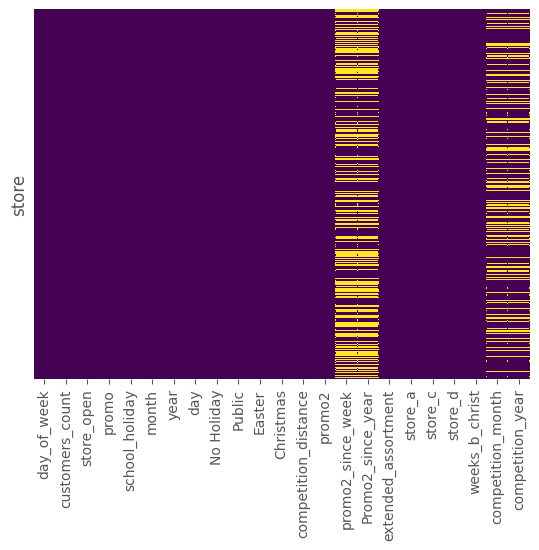

In [884]:
#see the number of null values
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [885]:
from sklearn.base import BaseEstimator, TransformerMixin
#definition of columns with NA values
NA_columns=['competition_distance','promo2_since_week','Promo2_since_year','competition_month','competition_year']

class Null_Transform(BaseEstimator, TransformerMixin):
    def __init__(self, df,list_of_columns): # no *args or *kargs
        self.df = df
    def NA_to_MEAN(df,list_of_columns):
        # fill null values with mean of the values in column
        for col in list_of_columns:
            df[col] = df[col].fillna((int(df[col].mean())))
        

nls = Null_Transform
nls.NA_to_MEAN(X_train,NA_columns)

# SCALER

In [886]:
#import of scaler which scale features using statistics that are robust to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


#classical process
#scaler = RobustScaler()
#scaler.fit(X_train)
#scaled_features=scaler.transform(X_train)
#features=pd.DataFrame(scaled_features,columns=X_train.columns)

#  MODEL TRAINING

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [887]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf = RandomForestRegressor()

rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

### Pipeline of scaler and ML model 

In [888]:
pipeline = Pipeline(steps = [('scaler', scaler),
                             ('rf', rf)])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         ve

# Random Search with Cross Validation

### Paramter tuning 

In [889]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(60, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Create the random grid
random_grid = {
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf}
pprint(random_grid)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipeline, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'rf__max_depth': [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, None],
 'rf__max_features': ['auto', 'sqrt'],
 'rf__min_samples_leaf': [1, 2],
 'rf__min_samples_split': [2, 5]}
Fitting 3 folds for each of 96 candidates, totalling 288 fits


/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning:

The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              RobustScaler(copy=True,
                                                           quantile_range=(25.0,
                                                                           75.0),
                                                           with_centering=True,
                                                           with_scaling=True)),
                                             ('rf',
                                              RandomForestRegressor(bootstrap=True,
                                                                    ccp_alpha=0.0,
                                                                    criterion='mse',
                                                                    max_depth=None,
                                                                    ma

In [890]:
#find best params of fit
rf_random.best_params_


{'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': None}

# Grid Search

### Paramter tuning

In [891]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'rf__max_depth': [80, 90, 100, 110],
    'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__min_samples_split': [8, 10, 12]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max

In [892]:
grid_search.best_params_

{'rf__max_depth': 100,
 'rf__max_features': 3,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 8}

# TEST DATASET TRANSFORMATIONS

Checking NULL values within X_test dataset

<AxesSubplot:ylabel='store'>

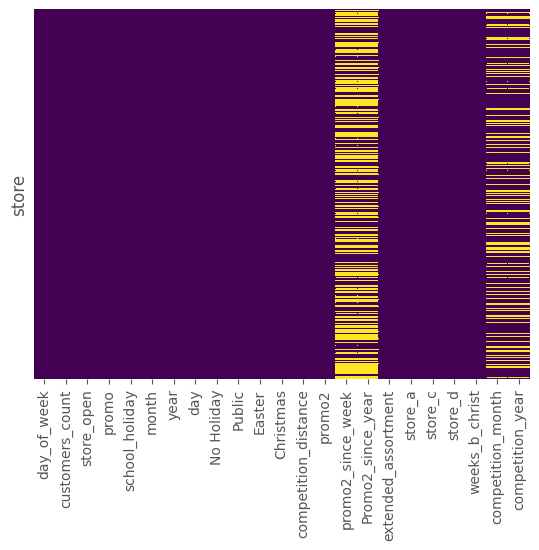

In [893]:
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Apply Na to mean function on columns containg NA values

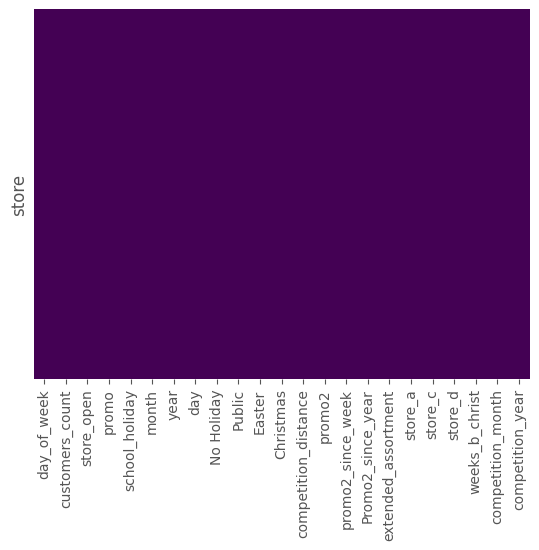

In [894]:
NA_to_MEAN(X_test, NA_columns)

# PERFORMANCE EVALUATION

### Evaluation Function

In [895]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### Default model 

In [896]:
#gives the coefficient of determination R^2 of the prediction, best possible score is 1
pipeline.score(X_test,y_test)

0.987030283003452

In [897]:
base_accuracy = evaluate(pipeline, X_test, y_test)

Model Performance
Average Error: 252.1185 degrees.
Accuracy = 95.36%.


In [898]:
#using metrincs of linear regression we can find error of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print('MAE :' +str(mean_absolute_error(y_test,pred_pip)))
print('MSE :' +str(mean_squared_error(y_test,pred_pip)))
print('RMSE :' +str(np.sqrt(mean_squared_error(y_test,pred_pip))))

MAE :252.09741141074213
MSE :152941.17142526188
RMSE :391.0769379869668


0.983378790570414 85.44902493291684


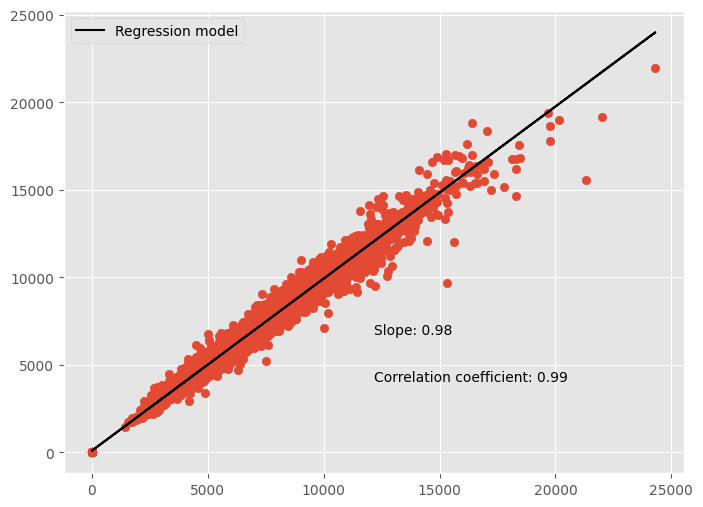

In [899]:
from scipy import stats
corr_coeff=stats.pearsonr(pred_pip, y_test)[0]

fig,ax =plt.subplots(figsize=(8,6))
ax.scatter(y_test,pred_pip)
#compute fit
m, b = np.polyfit(y_test, pred_pip, 1)
ax.plot(y_test, m*y_test+b, color='k', label='Regression model')
ax.legend()
plt.text(0.5, 0.3, 'Slope: ' +str(round(m,2)) , transform = ax.transAxes, fontsize = 10)
plt.text(0.5, 0.2, 'Correlation coefficient: ' +str(round(corr_coeff,2)) , transform = ax.transAxes, fontsize = 10)

print(m,b)

### Best Random Search Model 

In [900]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 252.5784 degrees.
Accuracy = 95.35%.


In [901]:
print('Improvement of {:0.4f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.0086%.


### Grid Search Model 

In [902]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 312.2399 degrees.
Accuracy = -inf%.


In [903]:
print('Improvement of {:0.4f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -inf%.


# OUTPUT

In [904]:
np.savetxt('predictions.csv',pred_pip)

# Importance of variables


In [905]:
#apply transformation on data so we can plot them correctly 
nls.NA_to_MEAN(master_sales,NA_columns)
sales_transformed = pd.DataFrame(scaler.fit_transform(master_sales), index = master_sales.index, columns = master_sales.columns)

#list of feature columns except target column Sales
cl_list = sales_transformed.drop('Sales', axis=1).columns.values

#compute correlation coef of Sales with other columns
sales_corr=[]
for i in cl_list:
     sales_corr.append(stats.pearsonr(sales_transformed['Sales'], sales_transformed[i])[0])



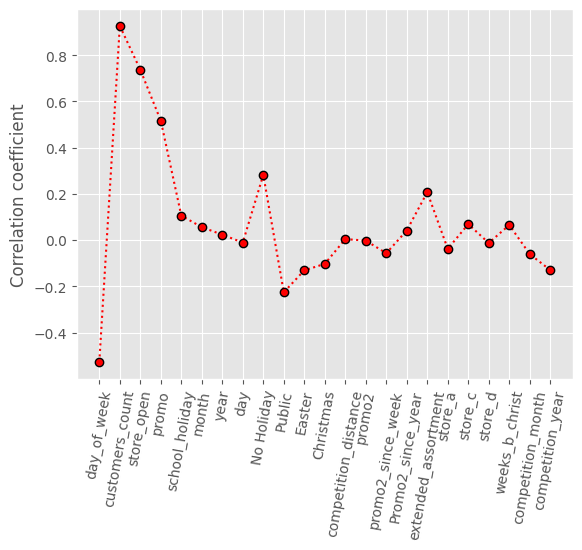

In [906]:
#plot corr coef against features
import plotly.express as px

plt.plot(sales_transformed.drop('Sales',axis=1).columns,sales_corr,'o:r',mec='k')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=80)
plt.show()

We can see from graph that the feature that has the highest impact on Sales prediction are:  
- customer_count
- store_open
- promo


# BUSINESS IMPLICATIONS

We used RandomForestRegressor model:
- comes from random foreast family -> uses several decision trees on various combination of paramters and uses averaging to improve accuracy of predictions 
- reduces overfitting in decision trees
- good in predicting of customer eligibility